In [ ]:
from Bio import SeqIO
import pandas as pd
import os

# Initialize an empty list to store sequences and labels
sequences_data = []

# Define the folder where your FASTA files are stored
folder_path = "C:\\Users\\User\\SSRML\\SSR"

# List of file names and corresponding labels
files_and_labels = [
    {"filename": "BOPP01_di_1.fasta", "label": "di"},
    {"filename": "BOPP01_tri_1.fasta", "label": "tri"},
    {"filename": "BOPP01_Tetra_1.fasta", "label": "tetra"},
    {"filename": "BOPP01_Penta_1.fasta", "label": "penta"},
    {"filename": "BOPP01_Hexa_1.fasta", "label": "hexa"}
]

# Process each file
for file_label_pair in files_and_labels:
    fasta_file_path = os.path.join(folder_path, file_label_pair["filename"])
    
    for record in SeqIO.parse(fasta_file_path, "fasta"):
        sequences_data.append({
            "Sequence": str(record.seq),
            "Label": file_label_pair["label"],
            "Sequence_Size": len(record.seq)  # Adding sequence size
        })

# Create a Pandas DataFrame from the list
merged_df = pd.DataFrame(sequences_data)

# Shuffle the DataFrame
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

# Add a column for sequence size
merged_df['Sequence_Size'] = merged_df['Sequence'].apply(len)  # This line is not needed as we already calculated the length

# Save the DataFrame to a CSV file if needed
merged_df.to_csv("merged_sequences.csv", index=False)

# Show the first few rows of the DataFrame
print(merged_df.head())


In [ ]:
from Bio import SeqIO
import pandas as pd
import os

# Initialize an empty list to store sequences and labels
sequences_data = []

# Define the folder where your FASTA files are stored
folder_path = "C:\\Users\\User\\SSRML\\SSR"

# List of file names and corresponding labels
files_and_labels = [
    {"filename": "BOPP01_di_1.fasta", "label": "di"},
    {"filename": "BOPP01_tri_1.fasta", "label": "tri"},
    {"filename": "BOPP01_Tetra_1.fasta", "label": "tetra"},
    {"filename": "BOPP01_Penta_1.fasta", "label": "penta"},
    {"filename": "BOPP01_Hexa_1.fasta", "label": "hexa"}
]

# Process each file
for file_label_pair in files_and_labels:
    fasta_file_path = os.path.join(folder_path, file_label_pair["filename"])
    
    for record in SeqIO.parse(fasta_file_path, "fasta"):
        sequences_data.append({
            "Sequence": str(record.seq),
            "Label": file_label_pair["label"],
            "Sequence_Size": len(record.seq)  # Adding sequence size
        })

# Create a Pandas DataFrame from the list
merged_df = pd.DataFrame(sequences_data)

# Shuffle the DataFrame
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

# Save the shuffled DataFrame to a CSV file
shuffled_df.to_csv("shuffled_sequences.csv", index=False)

# Show the first few rows of the shuffled DataFrame
print(shuffled_df.head())


In [ ]:
from Bio import SeqIO
import pandas as pd
import os

# Initialize an empty list to store valid sequences and labels
sequences_data = []

# Define the folder where your FASTA files are stored
folder_path = "C:\\Users\\User\\SSRML\\SSR"

# List of file names and corresponding labels
files_and_labels = [
    {"filename": "BOPP01_di_1.fasta", "label": "di"},
    {"filename": "BOPP01_tri_1.fasta", "label": "tri"},
    {"filename": "BOPP01_Tetra_1.fasta", "label": "tetra"},
    {"filename": "BOPP01_Penta_1.fasta", "label": "penta"},
    {"filename": "BOPP01_Hexa_1.fasta", "label": "hexa"}
]

# Function to check if a sequence contains only A, T, G, or C
def is_valid_sequence(sequence):
    return all(nucleotide in "ATGC" for nucleotide in sequence)

# Process each file
for file_label_pair in files_and_labels:
    fasta_file_path = os.path.join(folder_path, file_label_pair["filename"])
    
    for record in SeqIO.parse(fasta_file_path, "fasta"):
        sequence = str(record.seq)
        if is_valid_sequence(sequence):
            sequences_data.append({
                "Sequence": sequence,
                "Label": file_label_pair["label"],
                "Sequence_Size": len(sequence)  # Adding sequence size
            })

# Create a Pandas DataFrame from the list of valid sequences
merged_df = pd.DataFrame(sequences_data)

# Shuffle the DataFrame if needed
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

# Save the DataFrame to a CSV file if needed
shuffled_df.to_csv("noN_sequences.csv", index=False)

# Show the first few rows of the DataFrame
print(shuffled_df.head())


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
csv_file_path = "noN_sequences.csv"  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Plot the count of each label
label_counts = df['Label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Count')
plt.show()


In [ ]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
csv_file_path = "noN_sequences.csv"  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Specify the number of rows you want to sample
sample_size = 200  # Change this to the desired sample size

# Get a random sample of rows from the DataFrame
sampled_data = df.sample(n=sample_size)
sampled_data.to_csv("noN_sequences_sample.csv", index=False)
# Print the sampled data
print(sampled_data)


In [13]:
import pandas as pd

data = pd.read_csv('noN_sequences.csv')

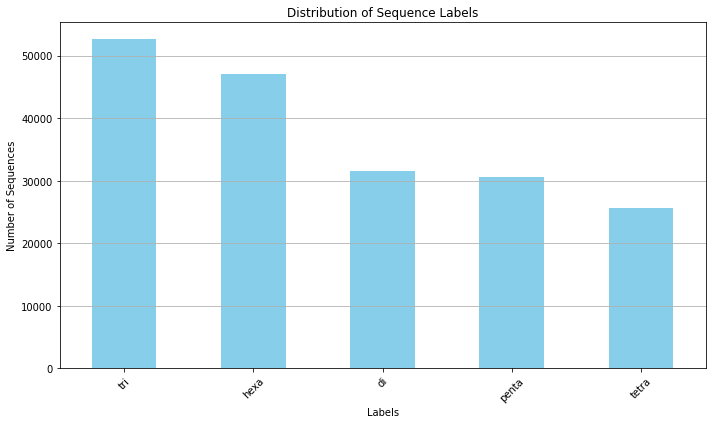

In [14]:
import matplotlib.pyplot as plt

# Analyzing the distribution of the sequence labels
label_distribution = data['Label'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
label_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sequence Labels')
plt.xlabel('Labels')
plt.ylabel('Number of Sequences')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


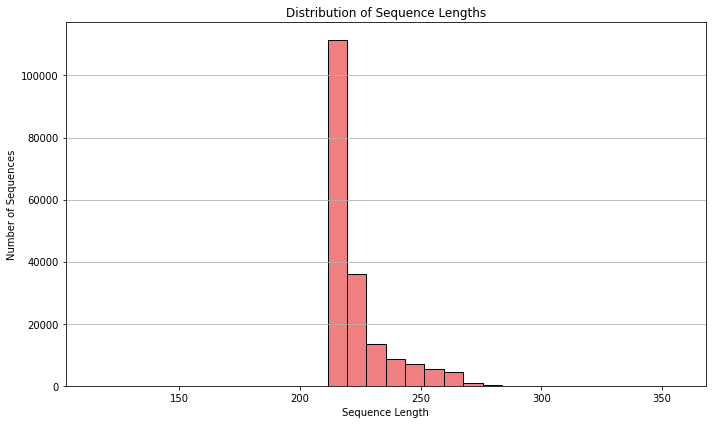

In [15]:
# Analyzing the distribution of sequence sizes
sequence_length_distribution = data['Sequence_Size']

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(sequence_length_distribution, bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Number of Sequences')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


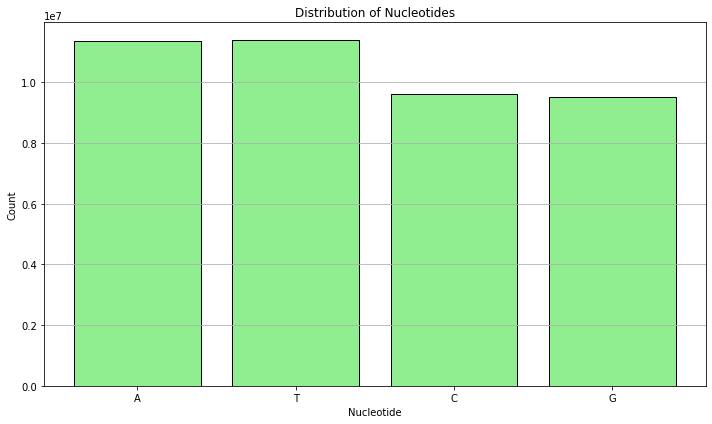

In [16]:
# Calculating the nucleotide distribution
nucleotide_distribution = {'A': 0, 'T': 0, 'C': 0, 'G': 0}

# Counting each nucleotide in the sequences
for sequence in data['Sequence']:
    for nucleotide in nucleotide_distribution:
        nucleotide_distribution[nucleotide] += sequence.count(nucleotide)

# Plotting the nucleotide distribution
plt.figure(figsize=(10, 6))
plt.bar(nucleotide_distribution.keys(), nucleotide_distribution.values(), color='lightgreen', edgecolor='black')
plt.title('Distribution of Nucleotides')
plt.xlabel('Nucleotide')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Function to one-hot encode a DNA sequence
def one_hot_encode(seq):
    mapping = {'A': [1, 0, 0, 0], 
               'C': [0, 1, 0, 0], 
               'G': [0, 0, 1, 0], 
               'T': [0, 0, 0, 1]}
    return np.array([mapping[i] for i in seq])

# Function to pad the sequences with zeros to make them of the same length
def pad_sequence(encoded_seq, max_len):
    padding_needed = max_len - len(encoded_seq)
    return np.pad(encoded_seq, ((0, padding_needed), (0, 0)), 'constant')

# Load the data
data = pd.read_csv('noN_sequences.csv')
max_len = data['Sequence_Size'].max()

data['Encoded'] = data['Sequence'].apply(one_hot_encode)
data['Padded_Encoded'] = data['Encoded'].apply(lambda x: pad_sequence(x, max_len))

# Convert labels into numerical values
le = LabelEncoder()
data['Label_Encoded'] = le.fit_transform(data['Label'])

# Split the data into training and testing sets
X = np.stack(data['Padded_Encoded'])
y = data['Label_Encoded'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, 
                                     Dense, GlobalAveragePooling1D, Attention)

# Define the input layer
input_seq = Input(shape=(X_train.shape[1], 4))

# 1D CNN layer
conv = Conv1D(64, 5, activation='relu')(input_seq)

# Max pooling
max_pool = MaxPooling1D(2)(conv)

# Bidirectional LSTM layer
bi_lstm = Bidirectional(LSTM(32, return_sequences=True))(max_pool)

# Self-attention layer
query_value_attention_seq = Attention()([bi_lstm, bi_lstm])

# Feedforward network with multiple hidden layers
dense_1 = Dense(128, activation='relu')(query_value_attention_seq)
dense_2 = Dense(64, activation='relu')(dense_1)

# Global pooling layer
global_pool = GlobalAveragePooling1D()(dense_2)

# Output layer
output = Dense(len(np.unique(y_train)), activation='softmax')(global_pool)

# Build the model
model = Model(inputs=input_seq, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [3]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=7, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/7
4689/4689 [==============================] - 315s 66ms/step - loss: 0.4784 - accuracy: 0.7922 - val_loss: 0.1548 - val_accuracy: 0.9231
Epoch 2/7
4689/4689 [==============================] - 319s 68ms/step - loss: 0.0798 - accuracy: 0.9680 - val_loss: 0.0168 - val_accuracy: 0.9941
Epoch 3/7
4689/4689 [==============================] - 328s 70ms/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0105 - val_accuracy: 0.9965
Epoch 4/7
4689/4689 [==============================] - 332s 71ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 5/7
4689/4689 [==============================] - 335s 72ms/step - loss: 0.0093 - accuracy: 0.9972 - val_loss: 0.0036 - val_accuracy: 0.9990
Epoch 6/7
4689/4689 [==============================] - 345s 73ms/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 7/7
1173/1173 [==============================] - 26s 22ms/step - loss: 0.0186 - accuracy: 0.9940
Test Loss: 0.0186
Tes

In [4]:
model.save("ssr_model_v2.h5")
loaded_model = tf.keras.models.load_model("ssr_model_v2.h5")


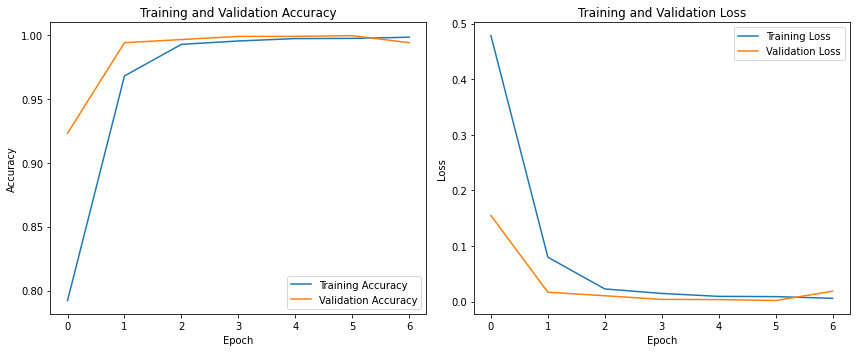

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
# Evaluate the model on test data
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1173/1173 [==============================] - 24s 20ms/step - loss: 0.0186 - accuracy: 0.9940
Test Loss: 0.018635297194123268
Test Accuracy: 0.9940280914306641


In [7]:
# Predict classes on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


1173/1173 [==============================] - 24s 20ms/step


 Classification Report:

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

          di       1.00      1.00      1.00      6298
        hexa       0.98      0.99      0.99      9549
       penta       0.99      0.98      0.98      6049
       tetra       1.00      1.00      1.00      5120
         tri       1.00      1.00      1.00     10493

    accuracy                           0.99     37509
   macro avg       0.99      0.99      0.99     37509
weighted avg       0.99      0.99      0.99     37509



Confusion Matrix:

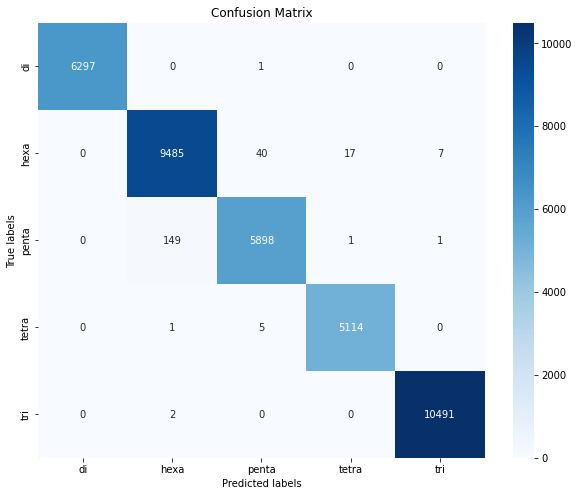

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


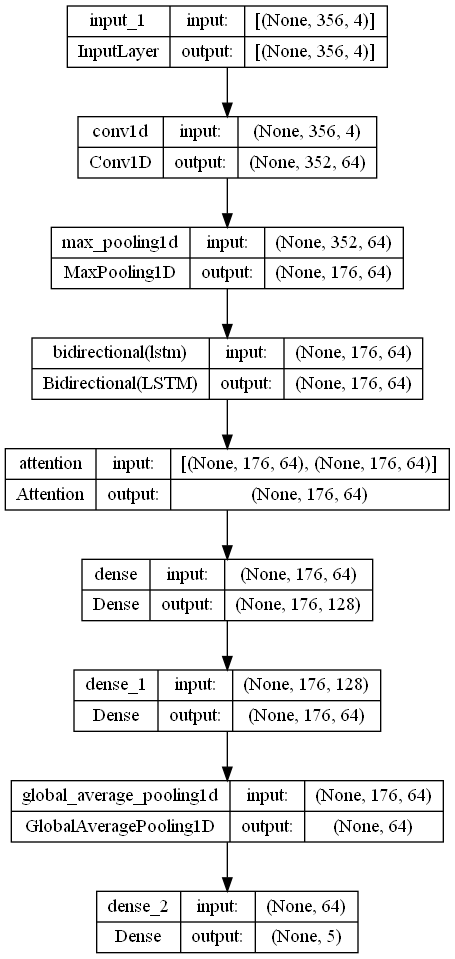

In [11]:
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# If you want to display the plot within a Jupyter notebook or similar environment, use:
from IPython.display import Image
Image(filename='model_architecture.png')


-----------------------------------------Codes for the paper ends here----------------------------------------------------------

1/1 [==============================] - 1s 535ms/step


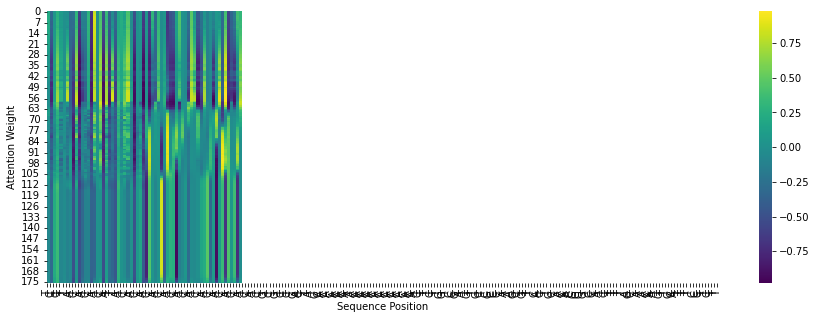

In [19]:
from tensorflow.keras.models import Model
import seaborn as sns
import matplotlib.pyplot as plt

# Define an intermediate model to output attention weights
attention_model = Model(inputs=model.input, outputs=query_value_attention_seq)

def prepare_sequence(seq, max_len):
    # One-hot encode
    encoded_sequence = one_hot_encode(seq)
    
    # Pad the sequence to the required length
    padded_sequence = pad_sequence(encoded_sequence, max_len)
    
    # Reshape to match the input shape of the model
    # Assuming the model expects shape (batch_size, sequence_length, features)
    reshaped_sequence = padded_sequence.reshape(1, max_len, -1)
    
    return reshaped_sequence

def plot_attention(attention_weights, sequence):
    plt.figure(figsize=(15, 5))
    sns.heatmap(attention_weights, cmap='viridis', cbar=True)
    plt.ylabel('Attention Weight')
    plt.xlabel('Sequence Position')
    plt.xticks(ticks=range(len(sequence)), labels=list(sequence))
    plt.show()

# Sample sequence you want to visualize attention for
sample_sequence = "TCTCTTTATCTATCTATCTATTTATCTATCTATCTATCTATCTATCTATCTATCTATCTATCTATCTATCTGTCTGTCTCTGACTTATGCACACACACATACACACACACACACACACACATCTTTCTTGGTCCGTATGTTGCTCGCCCTATAGCTGTTTCACTTGCTACAACGGGGTCCTATCTTTTTTAGCTATACAATGTTGCATTTTTCCCTTCTTT"  # Replace with your sequence
prepared_sequence = prepare_sequence(sample_sequence, max_len)

# Get attention weights
attention_weights = attention_model.predict(prepared_sequence)

# Visualize the weights
plot_attention(attention_weights[0], sample_sequence)  # [0] to select the first batch (since we input only one sequence)


In [26]:
def plot_focus_region_checked(attention_weights, sequence, window_size=10):
    # Ensure that there are non-zero attention weights
    if np.sum(attention_weights) == 0:
        print("All attention weights are zero. Visualization may not be meaningful.")
        return
    
    # Identify the position with the maximum attention
    max_position = np.argmax(attention_weights)
    
    # Determine the start and end positions for our window
    start_pos = max(0, max_position - window_size)
    end_pos = min(len(sequence), max_position + window_size)
    
    # Extract the sub-sequence and corresponding attention weights
    sub_sequence = sequence[start_pos:end_pos]
    sub_attention = attention_weights[start_pos:end_pos]
    
    # Check if sub_attention has valid values
    if len(sub_attention) == 0:
        print("Error extracting subsequence for visualization.")
        return
    
    plt.figure(figsize=(15, 5))
    
    # Normalize the attention weights for better visualization
    normalized_weights = (sub_attention - np.min(sub_attention)) / (np.max(sub_attention) - np.min(sub_attention))
    
    # Plotting the heatmap for the focused region
    sns.heatmap([normalized_weights], cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5, linecolor='black', cbar=True)
    
    plt.ylabel('Attention Weight')
    plt.xlabel('Sequence Position')
    plt.xticks(ticks=range(len(sub_sequence)), labels=list(sub_sequence))
    
    # Add a label to indicate the position with the highest attention
    plt.annotate(f'Max Attention\nPos: {max_position}\nValue: {attention_weights[max_position]:.2f}', 
                 xy=(window_size, 0), 
                 xytext=(window_size, 0.5), 
                 arrowprops=dict(facecolor='red', arrowstyle='->'),
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=12,
                 color='red')
    
    plt.tight_layout()
    plt.show()

# Uncomment the line below and replace the attention_weights and sample_sequence with your actual data when executing in your local environment
# plot_focus_region_checked(attention_weights[0], sample_sequence, window_size=10)



In [28]:
plot_focus_region_checked(attention_weights[0], sample_sequence, window_size=200)

Error extracting subsequence for visualization.
